In [373]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/home/ilia/PycharmProjects/rbd_hw/my_phone.csv')
df


,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4015,4015,747,NO,131,10,2.0,103,1,0,767,1024,1.0
4016,4016,766,NO,104,12,3.0,355,0,0,428,456,1.0
4017,4017,839,NO,112,9,1.0,408,1,1,1088,255,1.0
4018,4018,809,NO,123,7,2.0,112,1,0,365,1173,1.0


In [374]:
df.describe()

,Unnamed: 0,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.00000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,2009.50000,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,1160.61837,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,0.00000,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,1004.75000,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,2009.50000,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,3014.25000,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,4019.00000,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [375]:
# Колнка blutues  текстова, і ми в ній бачимо значення так або ні і це можна замінити на 0 або 1, але для початку
# впевнетись що в ній нема нічого окрім цих варіантів і нема пропусків.

df[df['bluetooth'].isna()].sum()  # перевіряємо що нема пропусків.


Unnamed: 0       0.0
battery_power    0.0
bluetooth        0.0
weight           0.0
memory           0.0
n_cores          0.0
ram              0.0
dual_sim         0.0
wifi             0.0
pixel_height     0.0
pixel_width      0.0
price_range      0.0
dtype: float64

In [376]:
import numpy as np

np.unique(df['bluetooth'])  #перевіряємо що маємо тільки два унікальних значення, тепер можемо замінити Yes - 1, No - 0

array(['NO', 'YES'], dtype=object)

In [377]:
df.loc[df[df['bluetooth'] == 'YES'].index, 'bluetooth'] = 1
df.loc[df[df['bluetooth'] == 'NO'].index, 'bluetooth'] = 0
np.unique(df['bluetooth'])  #перевіряємо що маємо тільки два унікальних значення 1 and 0

array([0, 1], dtype=object)

In [378]:
#Також бачу колонку без назви, яка повністю співпадає з індексацією пандаса, тому не несе для нас жодної цінності, її можна викинути.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [379]:
# Також хотілось би перевірити інші булеві колонки на унікальність
np.unique(df.wifi)
#З вай-фаєм все гуд

array([0, 1])

In [380]:
np.unique(df.dual_sim)
#Оо, заховався))

array(['0', '1', 'NO'], dtype=object)

In [381]:
# Заміняємо цих красунчиків та знов перевіряємо
df.loc[df[df['dual_sim'] == 'NO'].index, 'dual_sim'] = 0
np.unique(df.dual_sim)

TypeError: '<' not supported between instances of 'int' and 'str'

In [382]:
#І знову привіт)) мій прокол що я не зробив перевірку df.info але нічого, зараз зробимо заміни на строчний 0 а потім змінимо тип колонки
df.loc[df[df['dual_sim'] == 'NO'].index, 'dual_sim'] = '0'
df["dual_sim"] = pd.to_numeric(df["dual_sim"])
np.unique(df.dual_sim)

/tmp/ipykernel_142167/1328366856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dual_sim"] = pd.to_numeric(df["dual_sim"])


array([0, 1])

In [383]:
df.info()
# Бачимо що bluetooth також стринга, виконаємо той самий мув. А також дуже цікаво що колнка з кількістю ядер типу флоат, і прайс рендж також. В цих
# колонках не може бути чисел з плаваючою точкою, це дискретна величина, бо 2.4 ядра важко собі уявити, а також прайс рендж за умовою задачі у нас може
# бути між 0 та 3, що є також дискретною величиною

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  4020 non-null   int64  
 1   bluetooth      4020 non-null   object 
 2   weight         4020 non-null   int64  
 3   memory         4020 non-null   int64  
 4   n_cores        4020 non-null   float64
 5   ram            4020 non-null   int64  
 6   dual_sim       4020 non-null   int64  
 7   wifi           4020 non-null   int64  
 8   pixel_height   4020 non-null   int64  
 9   pixel_width    4020 non-null   int64  
 10  price_range    3020 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 345.6+ KB


In [384]:
#Спочатку зікінчимо з нашим bluetooth
df["bluetooth"] = pd.to_numeric(df["bluetooth"])
df.dtypes

/tmp/ipykernel_142167/854081312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bluetooth"] = pd.to_numeric(df["bluetooth"])


battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim           int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object

In [385]:
# Тепер напевне повернемось до наших кількості ядер та прайс ренджу
df[~df['n_cores'].apply(lambda x: x.is_integer())]
# Bingoo!

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,0,1077,1122,1.0
87,1083,1,178,64,3.5,3210,1,0,1025,1118,3.0
90,1724,0,177,57,3.5,2822,1,0,1605,1924,3.0
94,1322,0,140,7,3.5,1418,1,0,177,1990,1.0
95,1137,1,196,7,3.5,3616,0,1,942,1179,3.0
110,783,0,106,43,3.5,2016,1,0,1198,1471,1.0


In [386]:
df[~df['price_range'].apply(lambda x: x.is_integer())]
# Ну і по прайс ренджу ми бачимо тільки пропуски, але про них сказано в умові задачі, тому поки з ними ми нічого не робимо

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
2000,1043,1,193,5,3.0,3476,1,0,226,1412,NaN
2001,841,1,191,61,5.0,3895,1,0,746,857,NaN
2002,1807,1,186,27,3.0,2396,0,1,1270,1366,NaN
2003,1546,0,96,25,8.0,3893,1,0,295,1752,NaN
2004,1434,0,108,49,6.0,1773,0,1,749,810,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7.0,2121,0,0,644,913,NaN
2996,609,0,186,13,4.0,1933,1,1,1152,1632,NaN
2997,1185,0,80,8,1.0,1223,0,0,477,825,NaN
2998,1533,1,171,50,2.0,2509,1,0,38,832,NaN


In [387]:
df.describe()
# Зробимо ще раз дескраб та підрезюмуємо підвохи які зробили і які лишились.

# Зробили
# 1) Дропнули аннеймд колонку
# 2)Замінили блютуз текстовий формат на числовий.
# Знайшли текст в dual_sim та також замінили на числовий формат. Але вони схожі з попереднім тому будемо вважати за один
# Лишились
# 3)В колонці з кількістю ядер э не цілочисельні значення
# 4)Також в колонці pixel-height є нульові значення, що за контекстом вважаються неправильними
# 5)В колонці ram також ми бачимо дуже низьке мінімальне значення. Велика розбіжність між максимальним так квартилями

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.963930,1715.922637,0.507214,0.501990,672.843532,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220142,1184.300498,0.500010,0.500058,404.404351,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,364.750000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [388]:
#Почнемо з н-корів, насправді можна було замінити ці значення або округлити або замінити модою. Але є напркклад в сучасному світі є такі хараектиристики які суттєво можуть впливати на прайс, а це наша ціль. Тому на початку потрібно відслідкувати тенденції та кореляції пов'язані з цим атрибутом. Бо можливо значення 3.5 помилкове і не спроста всі нецілочисельні знвчення в цій колонці однакові. Тому для початку подивимось на кореляцію
import seaborn as sns

df.corr()
# Можемо прослідкувати дуже несуттєву кореляцію колонки н-кор майже з усіма параметрами, тому замінимо помилкові значення на моду

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
battery_power,1.000000,0.202061,0.001322,0.227132,0.166516,0.268012,-0.029181,0.003372,-0.044463,0.234409,0.295102
bluetooth,0.202061,1.000000,0.014691,0.241694,0.191305,0.296157,0.022755,0.003087,-0.084924,0.192876,0.142709
weight,0.001322,0.014691,1.000000,-0.005098,-0.006696,0.023810,-0.005141,0.014570,0.004641,0.011553,-0.016382
memory,0.227132,0.241694,-0.005098,1.000000,0.178856,0.309080,-0.002858,0.014851,-0.067509,0.235756,0.171308
n_cores,0.166516,0.191305,-0.006696,0.178856,1.000000,0.221545,-0.008171,0.001634,-0.070942,0.183732,0.113166
ram,0.268012,0.296157,0.023810,0.309080,0.221545,1.000000,0.041500,0.012478,-0.089169,0.288331,0.826434
dual_sim,-0.029181,0.022755,-0.005141,-0.002858,-0.008171,0.041500,1.000000,0.021338,-0.010794,0.016625,0.017631
wifi,0.003372,0.003087,0.014570,0.014851,0.001634,0.012478,0.021338,1.000000,0.022922,0.006872,0.019492
pixel_height,-0.044463,-0.084924,0.004641,-0.067509,-0.070942,-0.089169,-0.010794,0.022922,1.000000,0.326835,0.093849
pixel_width,0.234409,0.192876,0.011553,0.235756,0.183732,0.288331,0.016625,0.006872,0.326835,1.000000,0.258094


<AxesSubplot:>

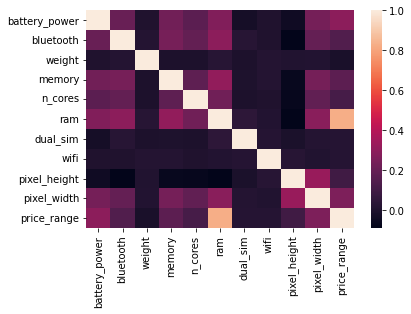

In [389]:
sns.heatmap(df.corr())

In [390]:
df[
    'n_cores'].mode()  # Мода в нас 4 і як гарно склалось що нанші значення не дуже далеко від неї тому округлення в нашому випадку також підійшло б

0    4.0
Name: n_cores, dtype: float64

In [391]:
#Заміняємо на перевіряємо
df.loc[df[~df['n_cores'].apply(lambda x: x.is_integer())].index, 'n_cores'] = df['n_cores'].mode()[0]
df[~df['n_cores'].apply(lambda x: x.is_integer())]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range


In [392]:
df['n_cores'] = pd.to_numeric(df['n_cores'], downcast='integer', errors='coerce')

/tmp/ipykernel_142167/3053347862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_cores'] = pd.to_numeric(df['n_cores'], downcast='integer', errors='coerce')


In [393]:
#Далі розберемося з нульовими pixel_height
# Таких записів ми маємо всього 4, це +- 0.1 відсоток. А до цього ж присутнє два записи де прайс рендж відсутній. Насправді я б їх викинув, але можна
# спробувати такий варіант. З таблиці кореляції можна побачити що атрибут pixel_height не суттєво, але найбільше коррелює з pixel_width. Тому можна
# спробувати дослідити до якого квартилю входять ті значення pixel_width у яких pixel_height 0 та взяти середнє pixel_height з того квартилю.
df[df.pixel_height <= 0]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,0,99,40,4,3692,0,0,0,1987,3.0
1933,897,1,154,2,8,1958,0,0,0,994,1.0
2420,986,0,80,26,8,1316,0,0,0,1214,NaN
2819,1992,1,153,43,5,2179,1,0,0,883,NaN


In [394]:
## Візьмемо наприклад перший запис де ширина 1987 він виходить за 75 квартиль, отримаємо звідти ширину и висоту і прослідкуємо тенденції

df.loc[:, ['pixel_height', 'pixel_width']]

# Особливих закономірностей не видно, але видно те що у більшості випадків ширина більше за висоту і все ж таки +- прослідкуваєьбся +- залежність але як 
# я і казав вище не сильно. Тому я покрутив і так і так і прийняв рішення замінити ці значення таким чином. Я отримаю серію різниць між шириною і висотою,
# возьму звідти середнє. Та для кожного нашого 0 відніму від поточної ширини це середнє і таким чином заміню. Нема чіткою впевненості що це правильно, але
# якщо врахувати те що у нас таких 4 записи з усієї генеральної сукупності і 2 записи с купуності яку ми будемо предіктиити то я думаю це не сильно 
# заафектить. Мені просто цікаво чи хоч трохи правильний в мене хід думок

,pixel_height,pixel_width
0,20,756
1,905,1988
2,1263,1716
3,1216,1786
4,1208,1212
...,...,...
4015,767,1024
4016,428,456
4017,1088,255
4018,365,1173


In [395]:
#Заміняємо та перевіряємо
pixel_height = df[df['pixel_height'] != 0].pixel_height

diff_mean = (df['pixel_width'] - pixel_height).mean()

for index in df[df.pixel_height <= 0].index:
    df.loc[index, 'pixel_height'] = df.iloc[index].pixel_width - diff_mean
    
    
df[df.pixel_height <= 0]

/tmp/ipykernel_142167/2455655435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'pixel_height'] = df.iloc[index].pixel_width - diff_mean


,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range


In [396]:
#Зробимо ще раз дескрайб

df.describe()
# Хм картина по pixel_height мене всеодно не радує. Було мінімальне 0, зараз 1 и максимальне 1960 - супер)) Треба щось робити
# Але можна зазначити таку річ у нас по всій генеральній сукупності можна поділити девайси на два типи, там де кількість
# пікселів по ширині більше за 
# кількість пікселів по висоті і навпаки. В попередньому cell я не ділив на множини бо в нас там pixel_height = 0 і не зрозуміло до якої він входить.
# Тому ми просто перерахували висоту віднявши від ширини середню різницю.

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.964925,1715.922637,0.507214,0.501990,673.666224,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220046,1184.300498,0.500010,0.500058,404.104108,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,1.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,366.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [397]:
pixel_height = df[df['pixel_height'] != 0].pixel_height

df_height_bigger = df[df['pixel_height'] > df['pixel_width']]
height_bigger_diff = (df_height_bigger.pixel_height - df_height_bigger.pixel_width)
height_bigger_diff_mean = height_bigger_diff.mean()

df_width_bigger = df[df['pixel_height'] < df['pixel_width']]
width_bigger_diff = (df_width_bigger.pixel_width - df_width_bigger.pixel_height)
width_bigger_diff_mean = width_bigger_diff.mean()

print('Mean of difference between height and width where HEIGHT BIGGER: ', height_bigger_diff_mean)
print('Deviation: ', height_bigger_diff.std())

print('Mean of difference between width and height where WIDTH BIGGER: ', width_bigger_diff_mean)
print('Deviation: ', width_bigger_diff.std())

# Ми порахували середню різницю між тим і тим атрибутом по двом множинам, середнє, та відхилення

Mean of difference between height and width where HEIGHT BIGGER:  311.1067615658363
Deviation:  223.71922494938542
Mean of difference between width and height where WIDTH BIGGER:  565.3673065908192
Deviation:  421.86902565276546


In [398]:
df_height_bigger.describe()
#Бачимо що по множині де висота більше за ширину +- адекватне співвідношення, тому ми візьмемо їх різницю за еталонну. Чому ми візьмемо за еталонну різницю
# саме з цієї множини. Тому що за результатом дескрайбу вона не аномальне і співвідношення екранів за метриками виглядає гарамонійно. Нема великих різниць
# між висотою та шириною. А коефіцієнт співвідношення не може бути різним в сторону де висота більше за ширину та навпаки. Ми вже не беремо до рорахнуку
# метрику по типу 16:9 4;3 і тдб по перше ми не маємо цієї інформації в датасеті, по друге на мою думку вираховувати це в рамках цього датасету це оверкіл.
# Отже ця різниця буде працювати в дві сторони

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,562.000000,562.0,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.0
mean,791.822064,0.0,138.546263,12.120996,2.537367,494.508897,0.492883,0.480427,889.108541,578.001779,1.0
std,29.566813,0.0,28.515415,2.886372,1.089338,280.454560,0.500395,0.500062,216.119720,231.516711,0.0
min,743.000000,0.0,88.000000,7.000000,1.000000,6.000000,0.000000,0.000000,350.000000,240.000000,1.0
25%,767.000000,0.0,116.000000,10.000000,2.000000,252.500000,0.000000,0.000000,742.250000,384.500000,1.0
50%,790.000000,0.0,139.000000,12.000000,2.500000,502.500000,0.000000,0.000000,917.000000,527.500000,1.0
75%,818.750000,0.0,162.000000,14.000000,4.000000,737.000000,1.000000,1.000000,1076.750000,756.750000,1.0
max,842.000000,0.0,188.000000,17.000000,4.000000,1002.000000,1.000000,1.000000,1199.000000,1160.000000,1.0


In [399]:
df_width_bigger.describe()
#Ось ми і локалізували аномалію

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,2457.000000
mean,1182.033844,0.435638,139.567255,29.845820,4.197281,1914.944461,0.509401,0.505351,638.571079,1203.938386,1.407000
std,435.160719,0.495912,34.447443,18.333466,2.270066,1155.569005,0.499984,0.500044,416.561329,426.882760,1.027512
min,500.000000,0.000000,80.000000,2.000000,1.000000,8.000000,0.000000,0.000000,1.000000,384.000000,0.000000
25%,796.000000,0.000000,110.000000,13.000000,2.000000,834.000000,0.000000,0.000000,322.000000,843.000000,1.000000
50%,1122.000000,0.000000,139.000000,28.000000,4.000000,1850.000000,1.000000,1.000000,568.000000,1161.000000,1.000000
75%,1563.000000,1.000000,169.000000,46.000000,6.000000,2915.000000,1.000000,1.000000,899.000000,1567.000000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [400]:
# Тепер нам потрібно знайти записи по колонці pixel_height в тій множині у яких різниця між атрибутами аномально відхиляється від еталонної. 
# Тому що не дуже реалістично коли по ширині у нас 1900 пікселей, а по висоті 4 наприклад))

# ВВиглядає страшно але насправді цей запис виглядає так, просто якщо я буду юзати df_width_bigger я не отримаю оригінальні індекси з нашого датафрейму,
# тому я його інтерпретивував так
# abnormal_pixel_height_df = df_width_bigger[(df_width_bigger['pixel_width'] - df_width_bigger['pixel_height']) > height_bigger_diff_mean]

abnormal_pixel_height_df = df[df['pixel_height'] < df['pixel_width']][(df[df['pixel_height'] < df['pixel_width']]['pixel_width'] - df[df['pixel_height'] < df['pixel_width']]['pixel_height']) > height_bigger_diff_mean]
abnormal_pixel_height_df

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2,2549,0,1,20.0,756,1.0
1,1021,1,136,53,3,2631,1,0,905.0,1988,2.0
2,563,1,145,41,5,2603,1,0,1263.0,1716,2.0
3,615,1,131,10,6,2769,0,0,1216.0,1786,2.0
5,1859,0,164,22,1,1067,1,0,1004.0,1654,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4008,780,0,118,9,1,249,1,0,627.0,993,1.0
4010,750,0,164,15,2,572,0,0,572.0,1108,1.0
4013,754,0,145,15,4,591,1,0,660.0,1143,1.0
4014,825,0,163,9,3,48,0,1,482.0,856,1.0


In [401]:
#Знайшовши всі аномальні записи, ми перерахуєм в них висоту віднявши від ширини середню еталонну різницю.

import math

#Перерахуємо pixel_height та перевіримо
for index in abnormal_pixel_height_df.index:
    df.loc[index, 'pixel_height'] = math.ceil(df.iloc[index].pixel_width - height_bigger_diff_mean) 
df['pixel_height'] = pd.to_numeric(df['pixel_height'], downcast='integer', errors='coerce')

df.describe()
# Тепер ми бачимо більш менш прийнятну картину де кожен аттрибут більш мен гарні метрики, окрім ram, але ми ще ним не займались. І наші pixel-height 
# pixel_width виглядають не дуже через різницю між максиммальним та мінімальним, але на ці атрибути треба дивитись у співвідношені, тому все ок, 
# телефони можуть буть маленькими з маленьким дозволом екрану

/tmp/ipykernel_142167/3067631201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pixel_height'] = pd.to_numeric(df['pixel_height'], downcast='integer', errors='coerce')


,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.964925,1715.922637,0.507214,0.501990,938.179104,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220046,1184.300498,0.500010,0.500058,391.369800,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,190.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,628.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,902.000000,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,1225.250000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


(array([ 4.,  4.,  3.,  4.,  4.,  5.,  3.,  3.,  3.,  4.,  4.,  4.,  3.,
         3.,  3.,  6.,  2.,  1.,  4.,  2.,  1.,  4.,  5.,  3.,  7.,  3.,
         5.,  0.,  7.,  8.,  5.,  6.,  4.,  6.,  5.,  3.,  4.,  3.,  2.,
         9.,  2.,  7.,  5.,  8.,  0.,  3.,  5.,  5.,  6.,  7.,  3.,  7.,
         5.,  2.,  2.,  6.,  5.,  4.,  3.,  3.,  6.,  7.,  9.,  8., 10.,
         6.,  6.,  7.,  7.,  7.,  4., 10.,  7., 11., 11.,  5.,  9., 10.,
         6., 12.,  4.,  8., 10., 11.,  8., 13.,  3.,  9.,  6.,  7.,  7.,
         7.,  6.,  3.,  5.,  6.,  8.,  6., 10.,  6.,  8.,  6.,  3.,  6.,
         8.,  4.,  6., 13.,  6.,  9.,  4.,  6.,  7.,  6.,  8.,  6., 10.,
         4.,  7., 13.,  8.,  7.,  5.,  3.,  8.,  7., 12.,  9.,  7.,  8.,
         6.,  6.,  6.,  5., 11.,  6.,  7.,  2.,  9.,  7.,  5.,  6., 13.,
         3., 11.,  9., 13., 13.,  5., 11.,  9.,  8.,  7.,  6.,  8., 11.,
         8.,  5.,  5.,  8.,  6., 10.,  8.,  7., 12., 15.,  7.,  5.,  3.,
         8.,  7.,  4.,  6.,  8.,  8.,  8.,  7., 10.

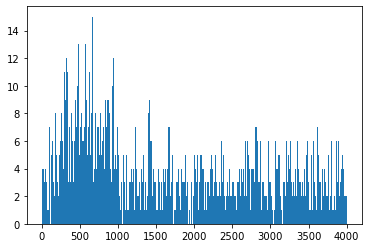

In [416]:
# Перейдемо до останнього пункту, це колонка рам, в якій у нас є супер велика розбіжність між максимальним та мінімальним значенням
# Вище ми дослідили вже, що вона дуже сильно корелює з нашим бажаним price_range 
plt.hist(df.ram, bins=1000)
# На гістограмі частот ми бачимо велику концентрацію від 0 до 1000, далі розподіл далеко але наближається до рівномірного якщо взяти менше бінів. І вже після
# десь нижче 100-200 у нас якісь дуже дивні частоти. Тому відфільтруєм те що нам потрібно, а саме екстримально низькі і подивимось що там.

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,  46., 103.,  95.,   9.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  88.,  95.,  70.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0

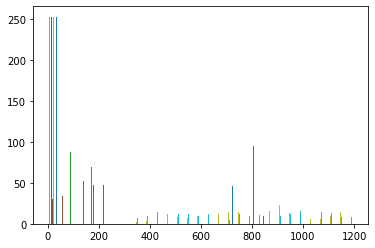

In [421]:
plt.hist(df[df.ram < 250], bins=30)
# Ось ми бачимо що у після 400 йде щось +- рівномірне. На відмітці 200 навіть щось схоже на нормальний розподіл. А ближче до 0 щось цікаве,
# спробуємо ще скоротити рендж

(array([[ 0.,  0.,  0.,  0.,  0.,  0., 33.,  8.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [16., 25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  3.,  7.,  6.,  8.,  7.,  7.],
        [ 0.,  0.,  4.,  4.,  7.,  3.,  5.,  2.,  8.,  8.],
        [41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([   0. ,  116.3,  232.6,  348.9,  465.2,  581.5,  697.8,  814.1,
         930.4, 1046.7, 1163. ]),
 <a list of 11 BarContainer objects>)

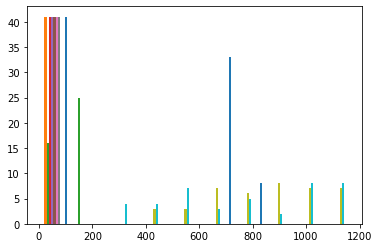

In [427]:
plt.hist(df[df.ram < 50], bins=10)
# Соь можемо побачити що десь в діапазоні від мінмального 6 до 100

In [442]:
df.corr()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
battery_power,1.000000,0.202061,0.001322,0.227132,0.166491,0.268012,-0.029181,0.003372,0.100287,0.234409,0.295102
bluetooth,0.202061,1.000000,0.014691,0.241694,0.191198,0.296157,0.022755,0.003087,0.053408,0.192876,0.142709
weight,0.001322,0.014691,1.000000,-0.005098,-0.006473,0.023810,-0.005141,0.014570,0.010920,0.011553,-0.016382
memory,0.227132,0.241694,-0.005098,1.000000,0.178981,0.309080,-0.002858,0.014851,0.092452,0.235756,0.171308
n_cores,0.166491,0.191198,-0.006473,0.178981,1.000000,0.221681,-0.008178,0.001296,0.073139,0.183980,0.113277
ram,0.268012,0.296157,0.023810,0.309080,0.221681,1.000000,0.041500,0.012478,0.111739,0.288331,0.826434
dual_sim,-0.029181,0.022755,-0.005141,-0.002858,-0.008178,0.041500,1.000000,0.021338,0.010959,0.016625,0.017631
wifi,0.003372,0.003087,0.014570,0.014851,0.001296,0.012478,0.021338,1.000000,0.001043,0.006872,0.019492
pixel_height,0.100287,0.053408,0.010920,0.092452,0.073139,0.111739,0.010959,0.001043,1.000000,0.865355,0.203236
pixel_width,0.234409,0.192876,0.011553,0.235756,0.183980,0.288331,0.016625,0.006872,0.865355,1.000000,0.258094


<AxesSubplot:>

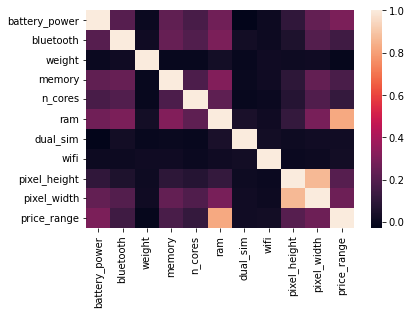

In [441]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop(labels=['weight', 'n_cores', 'dual_sim', 'wifi'], axis = 1)
Y = df['price_range']

from sklearn.model_selection import train_test_split

X_train = X[X['p']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

linear_regression.predict(X_test)